In [73]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load Dataset

In [76]:
X_train = np.loadtxt(r'C:\Users\RIHAB-PC\CatOrDogJupyter\input.csv', delimiter = ',')
Y_train = np.loadtxt(r'C:\Users\RIHAB-PC\CatOrDogJupyter\labels.csv', delimiter = ',')

X_test = np.loadtxt(r'C:\Users\RIHAB-PC\CatOrDogJupyter\input_test.csv', delimiter = ',')
Y_test = np.loadtxt(r'C:\Users\RIHAB-PC\CatOrDogJupyter\labels_test.csv', delimiter = ',')

In [77]:
X_train = X_train.reshape(len(X_train),100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [78]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


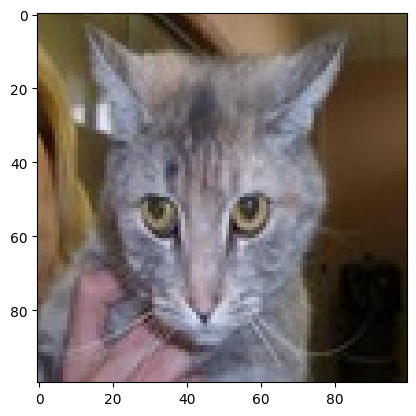

In [82]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

# Model
In this method, we define layers seperated by comma

In [91]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

This is another method in which we add the layers sepearatly

In [97]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [102]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [114]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.9330 - loss: 0.2372
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9358 - loss: 0.2090
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.9343 - loss: 0.2075 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9586 - loss: 0.1629
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9701 - loss: 0.1520


In [116]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6892 - loss: 0.6885


[0.6880195140838623, 0.6875]

# making predictions

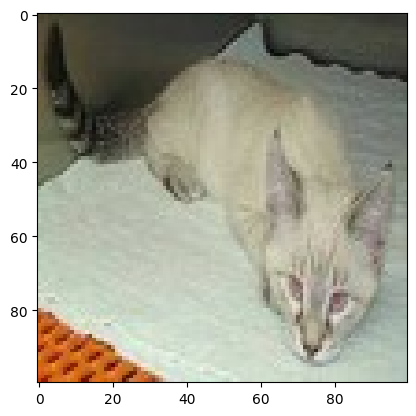

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Our model says it is a : cat


In [129]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

Y_pred = model.predict(X_test[idx2,:].reshape(1, 100, 100, 3))
Y_pred = Y_pred > 0.5

if (Y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)